# Universidad Autónoma de Nuevo León
## Facultad de Ciencias Fisico Matemáticas
### Maestría en Ciencia de Datos
#### Alumno: Francisco D. Treviño B.

### Tarea 3 (10 puntos).

# Instalación de Spark

## Se utilizó Docker para la instalación Spark usando una imagen, con el siguiente comando en Windows, según referencia en https://hub.docker.com/_/spark:
### docker pull spark


## Para correr Spark en Docker en modo interactivo se corre el siguiente comando:
### docker run -it spark:python3 /opt/spark/bin/pyspark

docker pull jupyter/pyspark-notebook
docker run -it --name spark_container_big_data -p 8888:8888 -p 4040:4040 -v /c/MCD_Big_Data:/home/jovyan/work jupyter/pyspark-notebook
docker stop spark_container_big_data
docker start spark_container_big_data

In [24]:
!pip install findspark

In [25]:
!pip install pyspark

In [26]:
!pip install py4j

In [27]:
# !pip install jupyterlab

In [28]:
!pip install pandas

In [29]:
from pyspark import SparkConf
from pyspark import SparkContext as sc

In [30]:
import os
import sys

import findspark
import pyspark

from pyspark.sql import DataFrame
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

In [31]:
from pyspark.sql import SparkSession

In [32]:
findspark.init()
findspark.find()

'/usr/local/spark'

In [33]:
spark=SparkSession.builder.appName("Intraday").getOrCreate()

In [34]:
spark

In [35]:
# Paso 1: Lista de archivos CSV
# csv_directory = "c/MCD_Big_Data/"
csv_directory = "/home/jovyan/work/"

# Nombres de los archivos CSV
# csv_file_names = ["intraday_bmv_a.txt", "intraday_bmv_b.txt", "intraday_bmv_c.txt", "intraday_bmv_d.txt"]
csv_file_names = ["intraday_bmv_d.txt"]

# Lista para almacenar los DataFrames cargados
df_list = []

# Cargar los archivos CSV, especificando que están delimitados por TAB
for csv_file_name in csv_file_names:
    # Leer el archivo CSV desde la ruta de Google Drive
    file_path = csv_directory + csv_file_name
    df = spark.read.csv(file_path, sep="\t", header=True, inferSchema=True)
    df_list.append(df)

In [36]:
# Unir todos los DataFrames en uno solo (si es necesario)
combined_df = df_list[0]
for df in df_list[1:]:
    combined_df = combined_df.union(df)

# Mostrar una muestra del DataFrame unido
combined_df.show(5)

+-------------------+------------+-------------+--------------------+------+-----+------+--------+----------+---------+-----------+-----------------+----------+--------------+-----------------+------------+---+-----+-------+
|         trade_time|match_number|instrument_id|           timestamp|volume|price|amount|buyer_id|buyer_name|seller_id|seller_name|auction_indicator|settlement|operation_type|concertation_type|price_setter|lot|chart| symbol|
+-------------------+------------+-------------+--------------------+------+-----+------+--------+----------+---------+-----------+-----------------+----------+--------------+-----------------+------------+---+-----+-------+
|2024-07-01 07:30:00|           1|            5|2024-07-01 07:30:...|     1| 62.5|  62.5|     112|     SCTIA|      112|      SCTIA|                P|         2|             C|                C|           0|  0|    0|WALMEX*|
|2024-07-01 07:30:00|           2|            5|2024-07-01 07:30:...|     2| 62.5| 125.0|     112|  

In [37]:
combined_df.printSchema()

root
 |-- trade_time: timestamp (nullable = true)
 |-- match_number: integer (nullable = true)
 |-- instrument_id: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- volume: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- amount: double (nullable = true)
 |-- buyer_id: integer (nullable = true)
 |-- buyer_name: string (nullable = true)
 |-- seller_id: integer (nullable = true)
 |-- seller_name: string (nullable = true)
 |-- auction_indicator: string (nullable = true)
 |-- settlement: integer (nullable = true)
 |-- operation_type: string (nullable = true)
 |-- concertation_type: string (nullable = true)
 |-- price_setter: integer (nullable = true)
 |-- lot: integer (nullable = true)
 |-- chart: integer (nullable = true)
 |-- symbol: string (nullable = true)



In [38]:
combined_df = combined_df.repartition(10)

In [39]:
# Convertir el DataFrame a un RDD
rdd = combined_df.rdd

In [40]:
rdd.take(5)  # Muestra los primeros 5 registros del RDD

[Row(trade_time=datetime.datetime(2024, 7, 12, 9, 40, 59), match_number=11755, instrument_id=5, timestamp=datetime.datetime(2024, 7, 12, 9, 40, 59, 345000), volume=11, price=67.3, amount=740.3, buyer_id=141, buyer_name='BTGP', seller_id=118, seller_name='HSBCB', auction_indicator=None, settlement=2, operation_type='C', concertation_type='O', price_setter=0, lot=0, chart=0, symbol='WALMEX*'),
 Row(trade_time=datetime.datetime(2024, 7, 2, 13, 38, 30), match_number=12367, instrument_id=5, timestamp=datetime.datetime(2024, 7, 2, 13, 38, 30, 706000), volume=300, price=61.68, amount=18504.0, buyer_id=113, buyer_name='CITI', seller_id=138, seller_name='CICB', auction_indicator=None, settlement=2, operation_type='C', concertation_type='O', price_setter=1, lot=1, chart=1, symbol='WALMEX*'),
 Row(trade_time=datetime.datetime(2024, 7, 9, 7, 40, 30), match_number=239, instrument_id=5, timestamp=datetime.datetime(2024, 7, 9, 7, 40, 30, 27000), volume=200, price=61.76, amount=12352.0, buyer_id=0, bu

In [41]:
combined_df.describe().show()

+-------+------------------+-------------+------------------+------------------+------------------+-----------------+----------+-----------------+-----------+-----------------+----------+--------------+-----------------+------------------+------------------+------------------+-------+
|summary|      match_number|instrument_id|            volume|             price|            amount|         buyer_id|buyer_name|        seller_id|seller_name|auction_indicator|settlement|operation_type|concertation_type|      price_setter|               lot|             chart| symbol|
+-------+------------------+-------------+------------------+------------------+------------------+-----------------+----------+-----------------+-----------+-----------------+----------+--------------+-----------------+------------------+------------------+------------------+-------+
|  count|           1243574|      1243574|           1243574|           1243574|           1243574|          1243574|   1243467|          1243

In [42]:
combined_df.filter(combined_df.buyer_id.isin([149, 50])).orderBy(F.asc("trade_time")).limit(100).show()

+----------+------------+-------------+---------+------+-----+------+--------+----------+---------+-----------+-----------------+----------+--------------+-----------------+------------+---+-----+------+
|trade_time|match_number|instrument_id|timestamp|volume|price|amount|buyer_id|buyer_name|seller_id|seller_name|auction_indicator|settlement|operation_type|concertation_type|price_setter|lot|chart|symbol|
+----------+------------+-------------+---------+------+-----+------+--------+----------+---------+-----------+-----------------+----------+--------------+-----------------+------------+---+-----+------+
+----------+------------+-------------+---------+------+-----+------+--------+----------+---------+-----------+-----------------+----------+--------------+-----------------+------------+---+-----+------+



In [43]:
from pyspark.sql import functions as F

# Agrupar por 'buy_participant_id' y la fecha (día) extraída de 'trade_time', luego sumar 'executed_quantity'
combined_df.groupBy(F.to_date("trade_time").alias("trade_date"), "buyer_id") \
           .sum("volume") \
           .orderBy(F.desc("trade_date")) \
           .show(truncate=False)

+----------+--------+-----------+
|trade_date|buyer_id|sum(volume)|
+----------+--------+-----------+
|2024-09-19|112     |56625      |
|2024-09-19|29      |4285       |
|2024-09-19|123     |550419     |
|2024-09-19|38      |162459     |
|2024-09-19|118     |117752     |
|2024-09-19|54      |97218      |
|2024-09-19|137     |28771      |
|2024-09-19|28      |1200000    |
|2024-09-19|141     |454422     |
|2024-09-19|24      |61580      |
|2024-09-19|0       |4879922    |
|2024-09-19|136     |670776     |
|2024-09-19|138     |215176     |
|2024-09-19|113     |859455     |
|2024-09-19|14      |1994679    |
|2024-09-19|121     |9213       |
|2024-09-19|119     |73102      |
|2024-09-19|51      |1127249    |
|2024-09-19|140     |100000     |
|2024-09-18|121     |110100     |
+----------+--------+-----------+
only showing top 20 rows



In [44]:
# Realizar estadísticas descriptivas básicas
price_rdd = rdd.map(lambda row: row["price"])

# Filtrar valores nulos
price_rdd = price_rdd.filter(lambda x: x is not None)

In [45]:
# Calcular estadísticas descriptivas básicas
count = price_rdd.count()
mean = price_rdd.mean()
min_value = price_rdd.min()
max_value = price_rdd.max()
stddev = price_rdd.stdev()

# Mostrar los resultados
print(f"Count: {count}")
print(f"Mean: {mean}")
print(f"Min: {min_value}")
print(f"Max: {max_value}")
print(f"Standard Deviation: {stddev}")

Count: 1243574
Mean: 62.46059547634484
Min: 58.69
Max: 68.74
Standard Deviation: 1.8942262809697152


In [48]:
df_a = combined_df

In [49]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Crear ventanas que particionen por símbolo y ordenen por fecha de operación ascendente
day_window = Window.partitionBy('symbol').orderBy(F.to_date('trade_time'))
week_window = Window.partitionBy('symbol').orderBy(F.weekofyear('trade_time'))
month_window = Window.partitionBy('symbol').orderBy(F.month('trade_time'))

# -----------------------------------
# Variaciones respecto al día anterior
# -----------------------------------

# Obtener el último registro del día anterior
df_a = df_a.withColumn('last_day_close', F.lag(F.col('price')).over(day_window))
df_a = df_a.withColumn('last_day_close_date', F.lag(F.col('trade_time')).over(day_window))

# Calcular la variación unitaria y porcentual diaria
df_a = df_a.withColumn('unitary_daily_variation', F.when(F.col('last_day_close').isNotNull(),
                                                         F.col('price') - F.col('last_day_close')).otherwise(None))
df_a = df_a.withColumn('percentage_daily_variation', F.when(F.col('last_day_close').isNotNull() & (F.col('last_day_close') != 0),
                                                            (F.col('price') - F.col('last_day_close')) / F.col('last_day_close') * 100).otherwise(None))

# -----------------------------------
# Variaciones respecto a la semana anterior
# -----------------------------------

# Obtener el último registro de la semana anterior
df_a = df_a.withColumn('last_week_close', F.lag(F.col('price')).over(week_window))
df_a = df_a.withColumn('last_week_close_date', F.lag(F.col('trade_time')).over(week_window))

# Calcular la variación unitaria y porcentual semanal
df_a = df_a.withColumn('unitary_weekly_variation', F.when(F.col('last_week_close').isNotNull(),
                                                          F.col('price') - F.col('last_week_close')).otherwise(None))
df_a = df_a.withColumn('percentage_weekly_variation', F.when(F.col('last_week_close').isNotNull() & (F.col('last_week_close') != 0),
                                                             (F.col('price') - F.col('last_week_close')) / F.col('last_week_close') * 100).otherwise(None))

# -----------------------------------
# Variaciones respecto al mes anterior
# -----------------------------------

# Obtener el último registro del mes anterior
df_a = df_a.withColumn('last_month_close', F.lag(F.col('price')).over(month_window))
df_a = df_a.withColumn('last_month_close_date', F.lag(F.col('trade_time')).over(month_window))

# Calcular la variación unitaria y porcentual mensual
df_a = df_a.withColumn('unitary_monthly_variation', F.when(F.col('last_month_close').isNotNull(),
                                                           F.col('price') - F.col('last_month_close')).otherwise(None))
df_a = df_a.withColumn('percentage_monthly_variation', F.when(F.col('last_month_close').isNotNull() & (F.col('last_month_close') != 0),
                                                              (F.col('price') - F.col('last_month_close')) / F.col('last_month_close') * 100).otherwise(None))

# Mostrar los resultados
df_a.select('trade_time', 'price', 'last_day_close', 'last_day_close_date', 'unitary_daily_variation', 'percentage_daily_variation',
            'last_week_close', 'last_week_close_date', 'unitary_weekly_variation', 'percentage_weekly_variation',
            'last_month_close', 'last_month_close_date', 'unitary_monthly_variation', 'percentage_monthly_variation').show()


+-------------------+-----+--------------+-------------------+-----------------------+--------------------------+---------------+--------------------+------------------------+---------------------------+----------------+---------------------+-------------------------+----------------------------+
|         trade_time|price|last_day_close|last_day_close_date|unitary_daily_variation|percentage_daily_variation|last_week_close|last_week_close_date|unitary_weekly_variation|percentage_weekly_variation|last_month_close|last_month_close_date|unitary_monthly_variation|percentage_monthly_variation|
+-------------------+-----+--------------+-------------------+-----------------------+--------------------------+---------------+--------------------+------------------------+---------------------------+----------------+---------------------+-------------------------+----------------------------+
|2024-07-01 09:19:12|62.48|          NULL|               NULL|                   NULL|                    

In [50]:
df_a.tail(10)

[Row(trade_time=datetime.datetime(2024, 9, 17, 13, 26, 24), match_number=21426, instrument_id=5, timestamp=datetime.datetime(2024, 9, 17, 13, 26, 24, 936000), volume=100, price=62.11, amount=6211.0, buyer_id=0, buyer_name='GS', seller_id=136, seller_name='MS', auction_indicator=None, settlement=2, operation_type='C', concertation_type='O', price_setter=1, lot=1, chart=1, symbol='WALMEX*', last_day_close=62.35, last_day_close_date=datetime.datetime(2024, 9, 17, 11, 45, 12), unitary_daily_variation=-0.240000000000002, percentage_daily_variation=-0.38492381716119, last_week_close=62.35, last_week_close_date=datetime.datetime(2024, 9, 17, 11, 45, 12), unitary_weekly_variation=-0.240000000000002, percentage_weekly_variation=-0.38492381716119, last_month_close=62.35, last_month_close_date=datetime.datetime(2024, 9, 17, 11, 45, 12), unitary_monthly_variation=-0.240000000000002, percentage_monthly_variation=-0.38492381716119),
 Row(trade_time=datetime.datetime(2024, 9, 17, 7, 45, 11), match_nu

# 1. Análisis Exploratorio de Datos (EDA)
#    a. Distribución de Volúmenes y Precios.
#    b. Análisis por Casos de Bolsa (Buyers/Sellers).
#    c. Análisis de Tiempos.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# import ace_tools as tools
df_a = combined_df

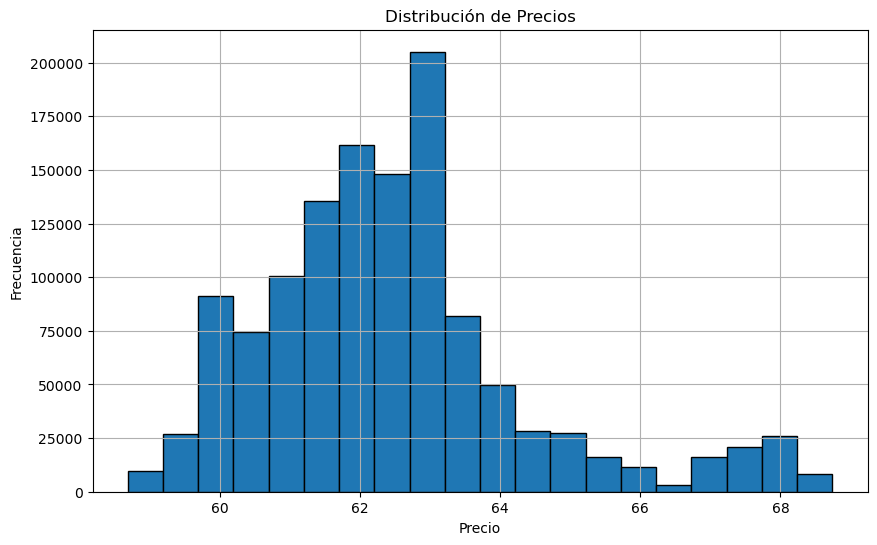

In [53]:
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import col
from pyspark.sql.functions import to_date

# Convertir la columna trade_time a tipo timestamp en PySpark
df_a = df_a.withColumn('trade_time', to_timestamp('trade_time'))

# Convertir la columna 'price' a tipo double (si aún no lo es)
df_a = df_a.withColumn('price', col('price').cast('double'))

# Extraer la fecha de 'trade_time'
df_a = df_a.withColumn('date', to_date('trade_time'))

# Convertir el DataFrame de PySpark a pandas
df_pandas = df_a.select('price').toPandas()

# Graficamos la distribución de precios diarios
plt.figure(figsize=(10,6))
plt.hist(df_pandas['price'], bins=20, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [54]:
from pyspark.sql import functions as F
from pyspark.sql.functions import format_number

# Agrupamos los datos por 'buyer_name' y calculamos las agregaciones usando PySpark, aplicamos format_number a las columnas numéricas

buyer_analysis = df_a.groupBy('buyer_name').agg(
    format_number(F.sum('volume'), 0).alias('total_volume'),
    format_number(F.avg('price'), 2).alias('average_price'),
    format_number(F.sum('amount'), 2).alias('total_amount'),
    F.count('match_number').alias('total_transactions')
)

# Mostrar el análisis de compradores
buyer_analysis.show()

+----------+------------+-------------+-----------------+------------------+
|buyer_name|total_volume|average_price|     total_amount|total_transactions|
+----------+------------+-------------+-----------------+------------------+
|       JPM| 116,230,159|        62.21| 7,238,298,279.49|            213176|
|      CITI|  34,602,246|        62.96| 2,135,022,716.92|             34404|
|      SANT|  10,490,168|        61.96|   653,179,329.79|             15788|
|      NULL|     985,215|        65.52|    63,048,325.45|               107|
|     BURSA|     584,160|        61.44|    35,952,181.00|               951|
|      BTGP|  15,374,889|        64.56|   970,660,084.35|             72056|
|     HSBCB|   3,471,564|        61.04|   213,381,068.47|             10957|
|      CICB|  27,717,922|        62.22| 1,730,079,166.05|             41460|
|       FMX| 236,261,006|        62.44|14,734,335,810.83|            267314|
|     BANOR|   8,159,569|        62.09|   508,489,971.60|             10061|

In [55]:
# Agrupamos los datos por 'buyer_name' y calculamos las agregaciones usando PySpark, aplicamos format_number a las columnas numéricas
seller_analysis = df_a.groupBy('seller_name').agg(
    format_number(F.sum('volume'), 0).alias('total_volume'),
    format_number(F.avg('price'), 2).alias('average_price'),
    format_number(F.sum('amount'), 2).alias('total_amount'),
    F.count('match_number').alias('total_transactions')
)

# Mostrar el análisis de vendedores
seller_analysis.show()

+-----------+------------+-------------+-----------------+------------------+
|seller_name|total_volume|average_price|     total_amount|total_transactions|
+-----------+------------+-------------+-----------------+------------------+
|        JPM|  75,368,093|        62.91| 4,721,047,321.67|            114140|
|       CITI|  46,420,568|        62.13| 2,858,386,090.43|             53673|
|       SANT|  13,926,140|        62.15|   870,240,483.09|             16893|
|       NULL|     985,215|        65.52|    63,048,325.44|               107|
|      BURSA|     404,309|        62.84|    25,342,755.31|               782|
|       BTGP|  17,634,917|        62.64| 1,111,584,989.00|             56575|
|      HSBCB|   7,849,765|        63.23|   494,338,804.22|             26419|
|       CICB|  26,189,194|        62.43| 1,637,120,829.87|             39724|
|        FMX| 240,793,128|        62.38|15,002,432,216.83|            295801|
|      BANOR|  15,605,050|        62.27|   974,165,724.84|      

In [56]:
# Vamos a analizar el impacto de las subastas en los precios usando el campo 'auction_indicator'
# Agrupamos los datos por 'auction_indicator' y calculamos el precio promedio en subastas y no subastas
auction_impact = df_a.groupBy('auction_indicator').agg(
    format_number(F.avg('price'), 2).alias('average_price'),
    format_number(F.sum('volume'), 0).alias('total_volume'),
    F.count('match_number').alias('total_transactions')
)

# Mostrar el análisis del impacto de las subastas
auction_impact.show()

+-----------------+-------------+-------------+------------------+
|auction_indicator|average_price| total_volume|total_transactions|
+-----------------+-------------+-------------+------------------+
|             NULL|        62.46|1,107,245,773|           1241371|
|                P|        62.52|      231,187|              2203|
+-----------------+-------------+-------------+------------------+



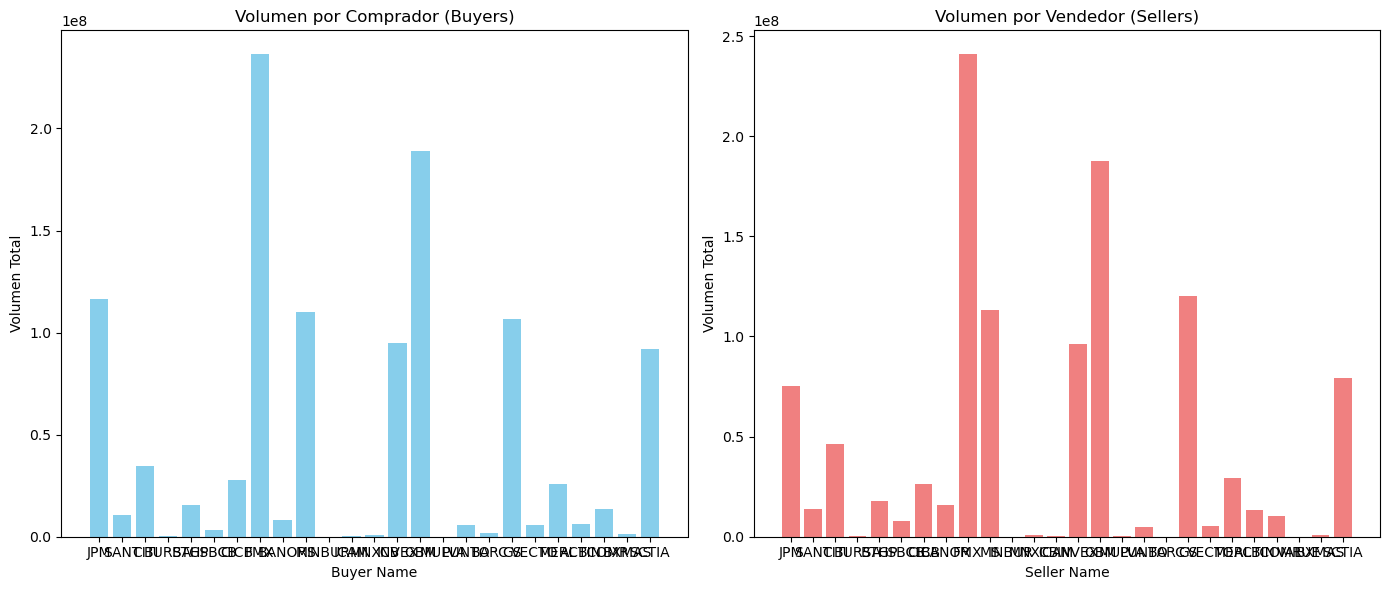

In [57]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Agrupar los datos por 'buyer_name' y 'seller_name' y sumar el volumen
buyer_volume = df_a.groupBy('buyer_name').agg(F.sum('volume').alias('volume')).filter(F.col('buyer_name').isNotNull()).toPandas()
seller_volume = df_a.groupBy('seller_name').agg(F.sum('volume').alias('volume')).filter(F.col('seller_name').isNotNull()).toPandas()

# Crear la visualización
fig, axs = plt.subplots(1, 2, figsize=(14,6))

axs[0].bar(buyer_volume['buyer_name'], buyer_volume['volume'], color='skyblue')
axs[0].set_title('Volumen por Comprador (Buyers)')
axs[0].set_xlabel('Buyer Name')
axs[0].set_ylabel('Volumen Total')

axs[1].bar(seller_volume['seller_name'], seller_volume['volume'], color='lightcoral')
axs[1].set_title('Volumen por Vendedor (Sellers)')
axs[1].set_xlabel('Seller Name')
axs[1].set_ylabel('Volumen Total')

plt.tight_layout()
plt.show()


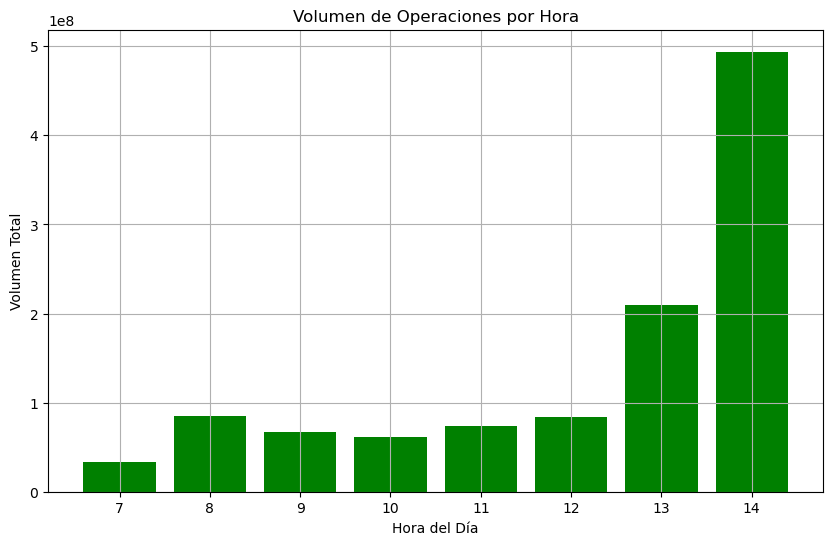

In [58]:
from pyspark.sql.functions import hour

# Crear una nueva columna 'hour' extrayendo la hora de 'trade_time'
df_a = df_a.withColumn('hour', hour('trade_time'))

# Agrupar por la columna 'hour' y sumar los volúmenes
hourly_volume = df_a.groupBy('hour').agg(F.sum('volume').alias('total_volume')).orderBy('hour').toPandas()

# Graficar el volumen por hora
plt.figure(figsize=(10,6))
plt.bar(hourly_volume['hour'], hourly_volume['total_volume'], color='green')
plt.title('Volumen de Operaciones por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Volumen Total')
plt.grid(True)
plt.show()


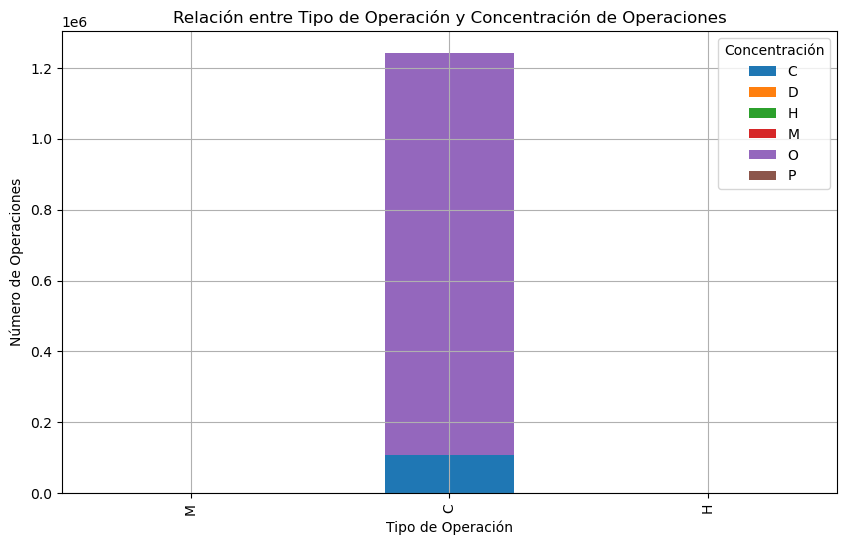

In [59]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Contar el número de operaciones por tipo de operación y tipo de concertación
operation_concentration = df_a.groupBy('operation_type', 'concertation_type').count()

# Convertir a un formato más adecuado para graficar (pivotear)
operation_concentration_pivot = operation_concentration.groupBy('operation_type').pivot('concertation_type').agg(F.sum('count')).fillna(0).toPandas()

# Graficar los resultados
operation_concentration_pivot.set_index('operation_type').plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Relación entre Tipo de Operación y Concentración de Operaciones')
plt.xlabel('Tipo de Operación')
plt.ylabel('Número de Operaciones')
plt.legend(title='Concentración')
plt.grid(True)
plt.show()


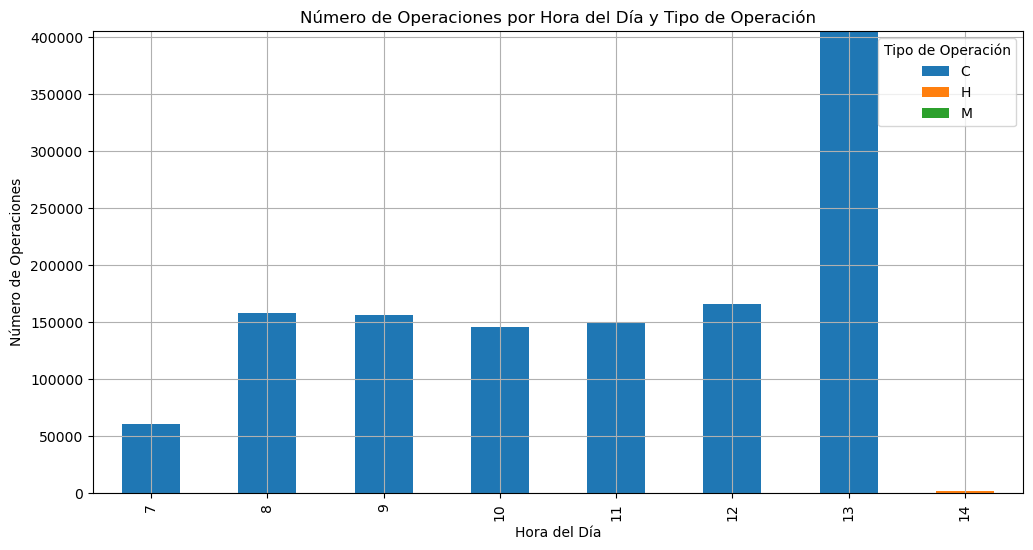

In [60]:
# Agrupar los datos por 'operation_type' y 'hour' y contar las ocurrencias
operation_hour_analysis = df_a.groupBy('operation_type', 'hour').count().orderBy('hour').toPandas()

# Crear una gráfica de barras apiladas para mostrar el número de operaciones por tipo y hora del día
operation_hour_pivot = operation_hour_analysis.pivot(index='hour', columns='operation_type', values='count').fillna(0)

# Graficar el análisis por hora del día y tipo de operación
operation_hour_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Número de Operaciones por Hora del Día y Tipo de Operación')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Operaciones')
plt.legend(title='Tipo de Operación')
plt.grid(True)
plt.show()


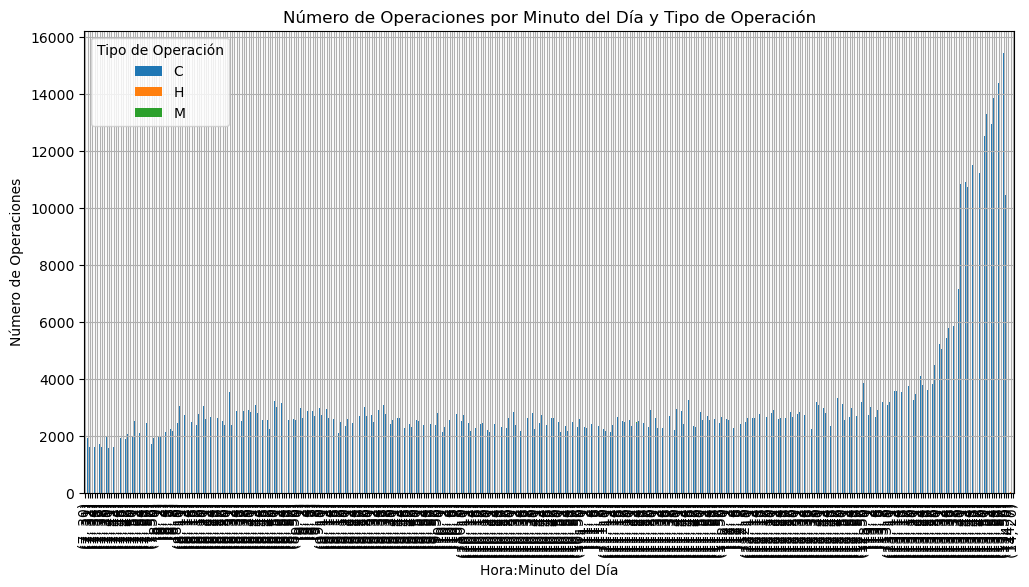

In [61]:
from pyspark.sql.functions import minute

# Crear una nueva columna 'minute' extrayendo el minuto de 'trade_time'
df_a = df_a.withColumn('minute', minute('trade_time'))

# Agrupar los datos por 'operation_type' y 'minute' y contar las ocurrencias
operation_minute_analysis = df_a.groupBy('operation_type', 'hour', 'minute').count().orderBy('hour', 'minute').toPandas()

# Crear una tabla pivote para organizar los datos para el gráfico
operation_minute_pivot = operation_minute_analysis.pivot(index=['hour', 'minute'], columns='operation_type', values='count').fillna(0)

# Graficar el análisis por minuto del día y tipo de operación
operation_minute_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Número de Operaciones por Minuto del Día y Tipo de Operación')
plt.xlabel('Hora:Minuto del Día')
plt.ylabel('Número de Operaciones')
plt.legend(title='Tipo de Operación')
plt.grid(True)
plt.show()


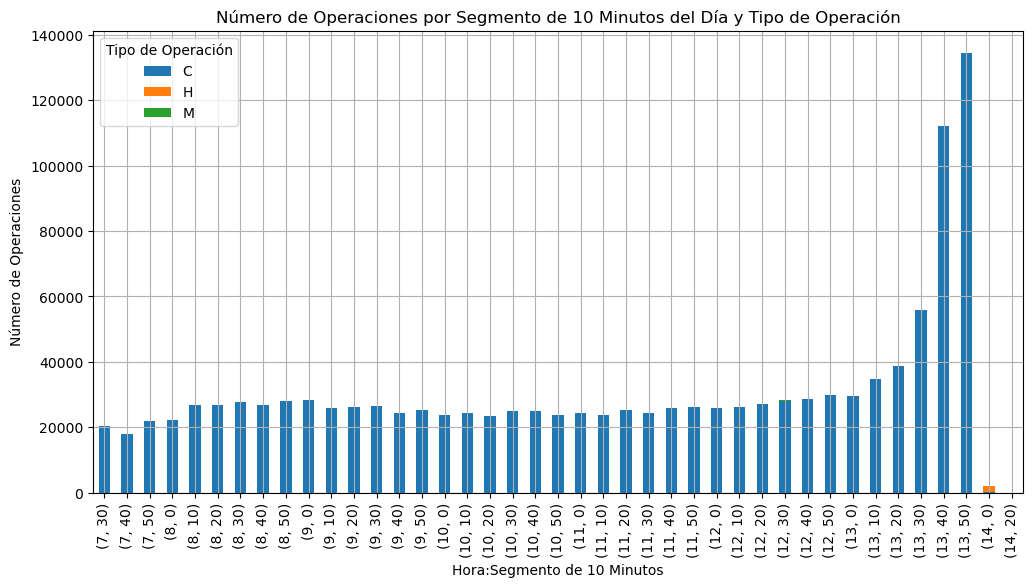

In [62]:
from pyspark.sql.functions import minute, floor

# Crear una nueva columna 'minute_segment' para agrupar por intervalos de 10 minutos
df_a = df_a.withColumn('minute_segment', (floor(minute('trade_time') / 10) * 10))

# Agrupar los datos por 'operation_type', 'hour' y el segmento de minutos
operation_minute_segment_analysis = df_a.groupBy('operation_type', 'hour', 'minute_segment').count().orderBy('hour', 'minute_segment').toPandas()

# Crear una tabla pivote para organizar los datos para el gráfico
operation_minute_segment_pivot = operation_minute_segment_analysis.pivot(index=['hour', 'minute_segment'], columns='operation_type', values='count').fillna(0)

# Graficar el análisis por segmento de 10 minutos del día y tipo de operación
operation_minute_segment_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Número de Operaciones por Segmento de 10 Minutos del Día y Tipo de Operación')
plt.xlabel('Hora:Segmento de 10 Minutos')
plt.ylabel('Número de Operaciones')
plt.legend(title='Tipo de Operación')
plt.grid(True)
plt.show()


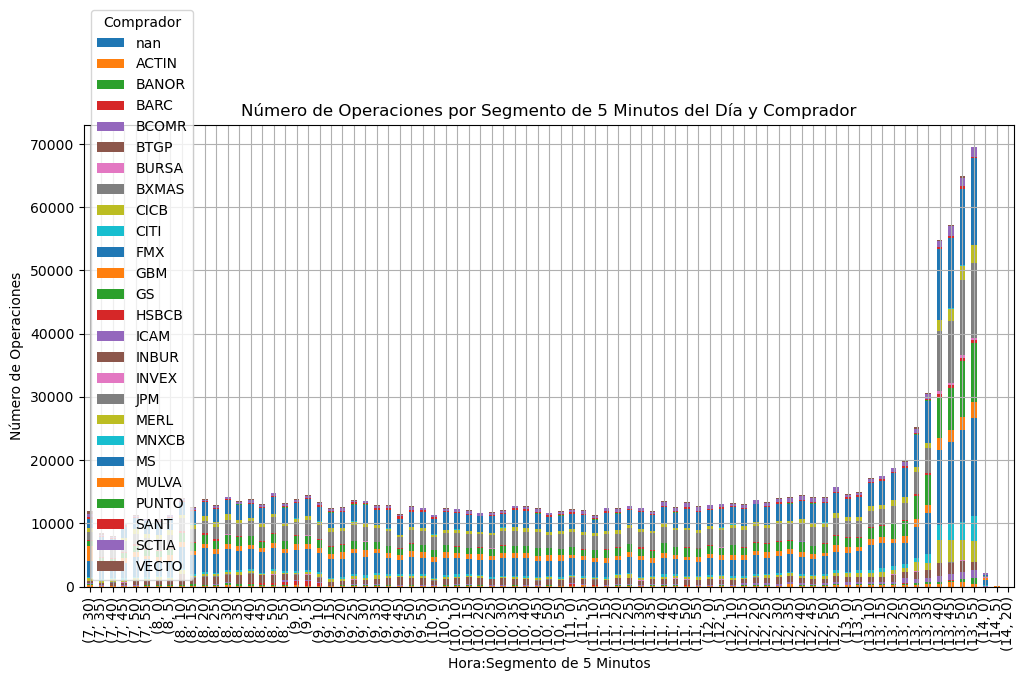

In [63]:
from pyspark.sql.functions import minute, floor

# Crear una nueva columna 'minute_segment' para agrupar en intervalos de 5 minutos
df_a = df_a.withColumn('minute_segment', (floor(minute('trade_time') / 5) * 5))

# Agrupar los datos por 'buyer_name', 'hour', y el segmento de 5 minutos
buyer_minute_segment_analysis = df_a.groupBy('buyer_name', 'hour', 'minute_segment').count().orderBy('hour', 'minute_segment').toPandas()

# Crear una tabla pivote para organizar los datos para el gráfico
buyer_minute_segment_pivot = buyer_minute_segment_analysis.pivot(index=['hour', 'minute_segment'], columns='buyer_name', values='count').fillna(0)

# Graficar el análisis por segmento de 5 minutos del día y comprador
buyer_minute_segment_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Número de Operaciones por Segmento de 5 Minutos del Día y Comprador')
plt.xlabel('Hora:Segmento de 5 Minutos')
plt.ylabel('Número de Operaciones')
plt.legend(title='Comprador')
plt.grid(True)
plt.show()


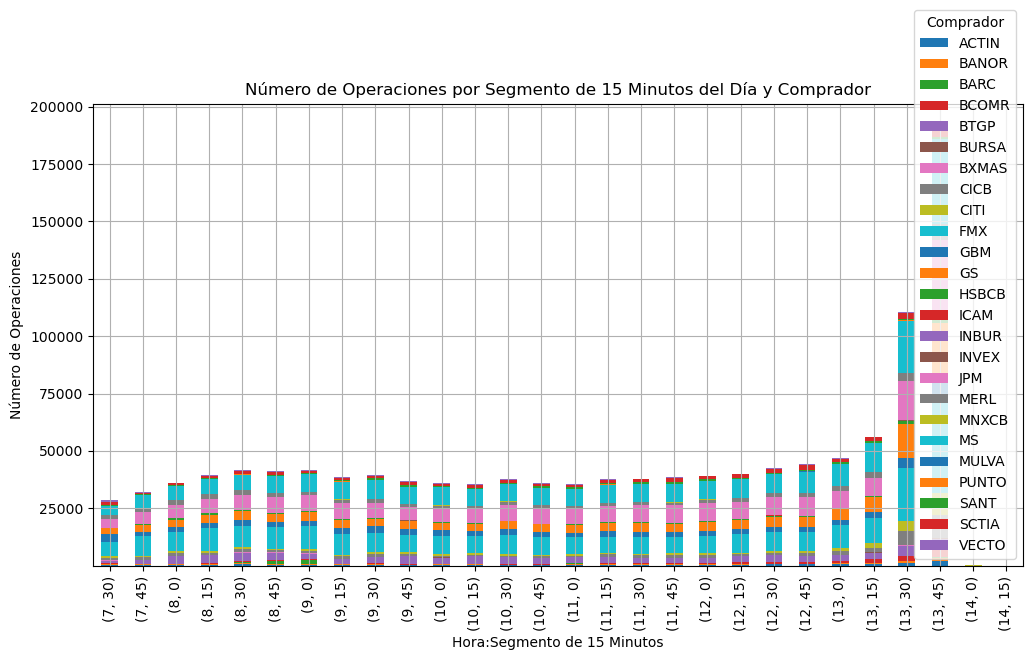

In [64]:
from pyspark.sql.functions import minute, floor, col

# Filtrar los datos para incluir solo registros donde 'operation_type' sea "C"
filtered_df = df_a.filter(col('operation_type') == 'C')

# Crear una nueva columna 'minute_segment' para agrupar en intervalos de 15 minutos
filtered_df = filtered_df.withColumn('minute_segment', (floor(minute('trade_time') / 15) * 15))

# Agrupar los datos por 'buyer_name', 'hour', y el segmento de 15 minutos y sumar las transacciones
buyer_minute_segment_analysis = filtered_df.groupBy('buyer_name', 'hour', 'minute_segment') \
    .agg(F.count('buyer_name').alias('transaction_count')).orderBy('hour', 'minute_segment').toPandas()

# Crear una tabla pivote para organizar los datos para el gráfico de compradores
buyer_minute_segment_pivot = buyer_minute_segment_analysis.pivot_table(index=['hour', 'minute_segment'], columns='buyer_name', values='transaction_count', aggfunc='sum').fillna(0)

# Graficar el análisis por segmento de 15 minutos del día y comprador
buyer_minute_segment_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Número de Operaciones por Segmento de 15 Minutos del Día y Comprador')
plt.xlabel('Hora:Segmento de 15 Minutos')
plt.ylabel('Número de Operaciones')
plt.legend(title='Comprador')
plt.grid(True)
plt.show()


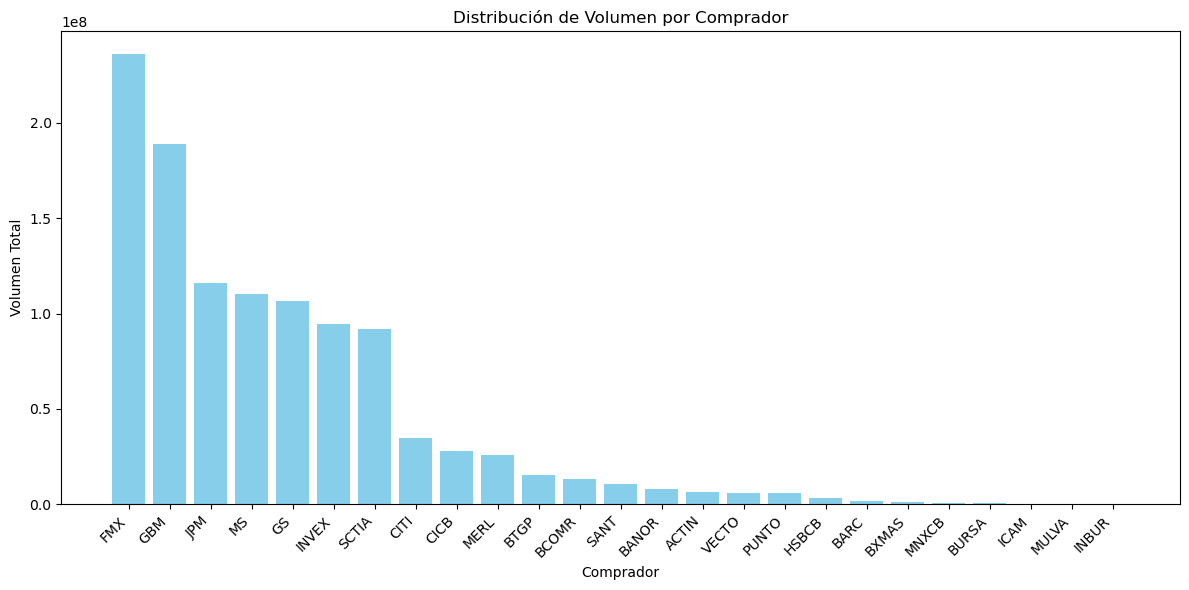

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Agrupar por 'buyer_name' y sumar el volumen, filtrando valores nulos en 'buyer_name'
buyer_volume_df = df_a.filter(F.col('buyer_name').isNotNull()).groupBy('buyer_name').agg(F.sum('volume').alias('total_volume'))

# Convertir a Pandas para facilitar la visualización
buyer_volume_pd = buyer_volume_df.orderBy(F.desc('total_volume')).toPandas()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(buyer_volume_pd['buyer_name'], buyer_volume_pd['total_volume'], color='skyblue')
plt.title('Distribución de Volumen por Comprador')
plt.xlabel('Comprador')
plt.ylabel('Volumen Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()
